In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook, load_workbook

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler



In [61]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [62]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df.shape

(205, 26)

In [23]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [24]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
df.isnull().sum() #Check for null value column wise

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.isnull().sum(axis = 1) #check for null value row wise

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [63]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [65]:
carcompany = []
for model in df['CarName']:
    carcompany.append(str(model.split(' ')[0]))
    
df['carcompany'] = np.array(carcompany)

/var/folders/km/tbrhbp4j73l0kypztcpv9t7w0000gn/T/ipykernel_23967/823420122.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(['carcompany']).median()['price'] [:10])


<Figure size 1500x700 with 0 Axes>

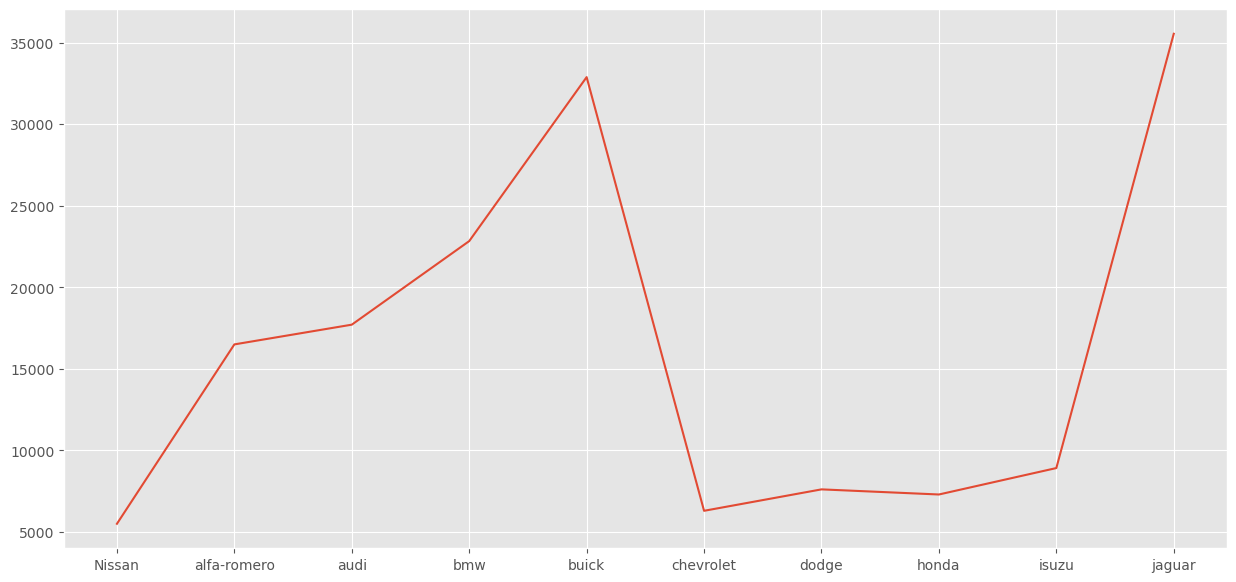

In [67]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(15,7))
    plt.plot(df.groupby(['carcompany']).median()['price'] [:10])
    plt.show()

In [68]:
df.CarName=df.CarName.astype('category').cat.codes
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [69]:
df.carcompany=df.carcompany.astype('category').cat.codes
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2


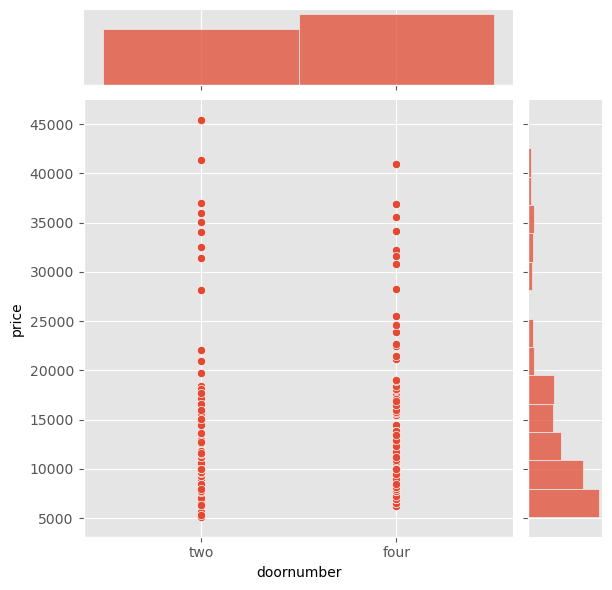

In [77]:
with plt.style.context (('ggplot')):
    sns.jointplot(x=df['doornumber'],y=df['price'],data=df)
    

    plt.show()

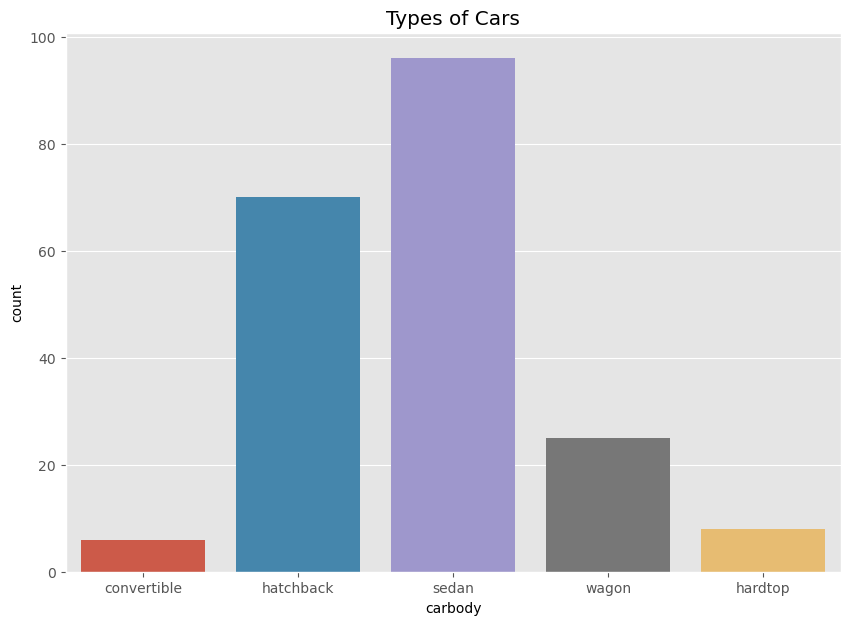

In [78]:
with plt.style.context (('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title('Types of Cars')
    sns.countplot(data=df,x=df['carbody'])
    
plt.show()

In [79]:

#Now Converting these 5 data into category
df.fuelsystem = df.fuelsystem.astype('category').cat.codes
df.fueltype = df.fueltype.astype('category').cat.codes
df.aspiration = df.aspiration.astype('category').cat.codes
df.doornumber = df.doornumber.astype('category').cat.codes
df.carbody = df.carbody.astype('category').cat.codes
df.drivewheel = df.drivewheel.astype('category').cat.codes
df.enginelocation = df.enginelocation.astype('category').cat.codes
df.enginetype = df.enginetype.astype('category').cat.codes
df.cylindernumber = df.cylindernumber.astype('category').cat.codes
df.carcompany = df.carcompany.astype('category').cat.codes
#We have coverted the Object Datatype to Value so that we can perform the analysis

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int16  
 3   fueltype          205 non-null    int8   
 4   aspiration        205 non-null    int8   
 5   doornumber        205 non-null    int8   
 6   carbody           205 non-null    int8   
 7   drivewheel        205 non-null    int8   
 8   enginelocation    205 non-null    int8   
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int8   
 15  cylindernumber    205 non-null    int8   
 16  enginesize        205 non-null    int64  
 1

In [81]:
df.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.967084
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.091524
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439,0.995209
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.063029
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.021522
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.164705
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.096025
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.041645
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.052188
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.006009


In [90]:
cor_matrix = np.array(df.corr())
for i in range(22):
    for j in range(22):
        if np.abs(cor_matrix[i][j]) >= 0.85 and np.abs(cor_matrix[i][j]) < 1:
            print(f'{df.columns[i]}------co-related-------{df.columns[j]}-----{cor_matrix[i][j]}')


wheelbase------co-related-------carlength-----0.8745874759642639
carlength------co-related-------wheelbase-----0.8745874759642639
enginesize------co-related-------price-----0.8741448025245117
price------co-related-------enginesize-----0.8741448025245117


In [96]:
df.dtypes

car_ID                int64
symboling             int64
aspiration             int8
doornumber             int8
carbody                int8
drivewheel             int8
enginelocation         int8
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
enginetype             int8
cylindernumber         int8
enginesize            int64
fuelsystem             int8
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
highwaympg            int64
price               float64
carcompany             int8
dtype: object

In [99]:
x_val = df.drop(['price'], axis=1) 
y_val = df['price']



In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, train_size= 0.8)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rsme = np.sqrt(mean_squared_error(y_test, y_pred))
ac = model.score(x_test,y_test)


In [101]:
print(f'The accuracy of the model is {round(ac*100,2)}%')

The accuracy of the model is 87.19%


In [139]:
def accuracy_generator (x_val,y_val, split=0.7):
    x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, train_size=split) 
    model=LinearRegression()
    model.fit(x_train, y_train) 
    y_pred=model. predict(x_test)
    rmse=np.sqrt(mean_squared_error (y_test,y_pred))
    ac=model.score(x_test,y_test)
    return rmse,ac

In [140]:
arr_rmse = []
arr_ac = []
for i in range (1):
    rmse,ac = accuracy_generator(x_val,y_val,split=.85)
    arr_rmse.append(rmse)
    arr_ac.append(ac)
    
    print(f'The average rmse is {round(np.average(arr_rmse),2)}')
    print(f'The accuracy of the model is {round(np.average(arr_ac)*100,2)}%')



The average rmse is 2600.85
The accuracy of the model is 87.09%


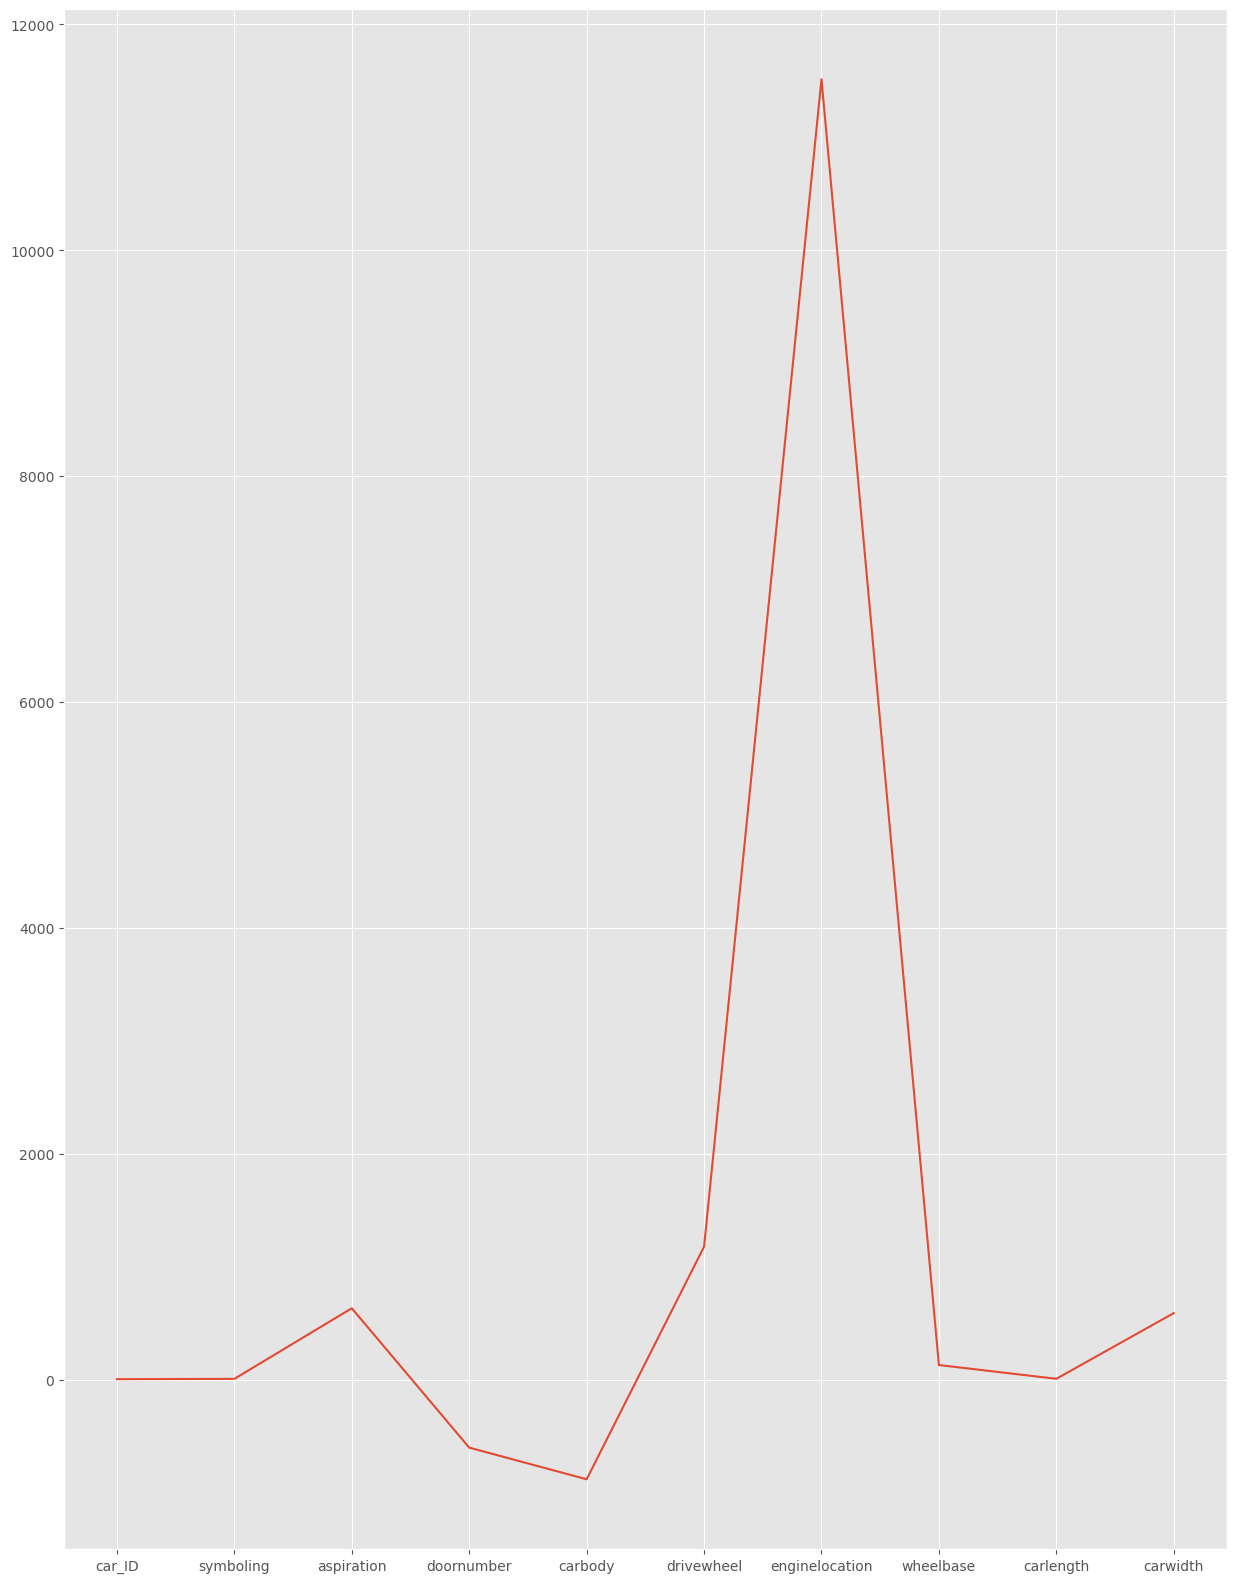

In [144]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(15,20))
    plt.plot(x_val.columns[:10], model.coef_[:10])
plt.show()
